# THEMIS data symmetry scatter plot

In [1]:
# Importing packages
import pandas as pd
smag = __import__('supermag-api')          # SuperMAG python API
logon = 'kd8oxt'                              # SuperMAG ID

import plotly.express as px                # for mapping, mainly
import plotly.graph_objects as go          # for mapping, mainly

import matplotlib.pyplot as plt
import numpy as np

# import os
# # os.environ["CDF_LIB"] = library_directory
# # os.environ["CDF_LIB"] = "~/CDF/lib"          # default "~/CDF/lib"
# from spacepy import pycdf                  # for reading CDF files

# For pulling data from CDAweb:
from ai import cdas
import datetime
from matplotlib import pyplot as plt

# for progress viz:
from tqdm .auto import tqdm
# from tqdm import tqdm_notebook as tqdm
# from tqdm.notebook import trange, tqdm
from IPython.display import clear_output     # Used as a workaround to make tqdm not do silly things

import pickle

from collections import Counter   # for listing unique values

# from hamsci_psws import goes

from scipy import signal

import os

# Import functions:

from magFunctions import *
import matplotlib.dates as mdates

from datetime import timedelta

In [2]:
# themis_events["Max"] = pd.to_datetime(themis_events["Max"])
# Counter(themis_events.index.date)

with open('themis_event_list_with_coords2.pkl', 'rb') as f:
    themis_events = pickle.load(f)
    
themis_events = themis_events.dropna()    # drop rows with missing values



pm = 30   # 30 degrees of margin

# themis_filtered = themis_events[themis_events['S1_SM_LON'] <= 40 + pm]
# themis_filtered = themis_events.drop(themis_events[(themis_events['S1_SM_LON'] <= 40 - pm) ].index)
                                                  #  | (themis_events['S1_SM_LON'] >= 40 + pm)
                                                  #  | (themis_events['S2_SM_LON'] <= 40 - pm)
                                                  #  | (themis_events['S2_SM_LON'] >= 40 + pm)
                                                  # ].index)
themis_events = themis_events.drop(themis_events[(themis_events['S1_SM_LON'] <= 40 - pm) ].index)
themis_events = themis_events.drop(themis_events[(themis_events['S1_SM_LON'] >= 40 + pm) ].index)
# themis_events = themis_events.drop(themis_events[(themis_events['S2_SM_LON'] <= 40 - pm) ].index)
# themis_events = themis_events.drop(themis_events[(themis_events['S2_SM_LON'] >= 40 + pm) ].index)

# themis_events = themis_events[(themis_events['Max'] >= pd.to_datetime('2014-12-31')) & (themis_events['Max'] <= pd.to_datetime('2017-12-31'))] # remove values before start, after end
themis_events = themis_events.loc[(themis_events.index >= pd.to_datetime('2014-12-31')) & (themis_events.index <= pd.to_datetime('2017-12-31'))]
themis_events = themis_events.loc[(themis_events.index >= pd.to_datetime('2016-6-1')) & (themis_events.index <= pd.to_datetime('2016-6-30'))]
# themis_events['S2_SM_LON'].astype(int)
# Counter(themis_events.index.date)

In [3]:
themis_events = themis_events.reset_index()

In [4]:
datetimes = themis_events.Max
# Calculate the start and end times for each event
start_times = [datetime - pd.Timedelta(minutes=30) for datetime in datetimes]
end_times = [datetime + pd.Timedelta(hours=1) for datetime in datetimes]

# Create a DataFrame with the events, start times, and end times
df = pd.DataFrame({
    'event': datetimes,
    'start': start_times,
    'end': end_times
})

# Print the DataFrame
df

,event,start,end
0,2016-06-01 22:36:02,2016-06-01 22:06:02,2016-06-01 23:36:02
1,2016-06-01 23:27:08,2016-06-01 22:57:08,2016-06-02 00:27:08
2,2016-06-06 12:16:19,2016-06-06 11:46:19,2016-06-06 13:16:19
3,2016-06-06 12:55:12,2016-06-06 12:25:12,2016-06-06 13:55:12
4,2016-06-06 12:57:02,2016-06-06 12:27:02,2016-06-06 13:57:02
...,...,...,...
240,2016-06-23 18:11:42,2016-06-23 17:41:42,2016-06-23 19:11:42
241,2016-06-23 18:15:13,2016-06-23 17:45:13,2016-06-23 19:15:13
242,2016-06-28 16:43:10,2016-06-28 16:13:10,2016-06-28 17:43:10
243,2016-06-28 16:58:56,2016-06-28 16:28:56,2016-06-28 17:58:56


In [5]:
# #.... and plot!

# from magFunctions import *

# conjugate_stations = pd.read_csv('conjugate_stations.csv') # TODO: FIX THIS FILE!
# conjugate_stations.Code
# stations = pd.read_csv('20220726-04-17-supermag-stations.csv', sep = ',')   # edited version of this spreadsheet
# stations = stations[stations.IAGA.isin(conjugate_stations.Code)] # Plot only the polar stations

# for index, row in df.iterrows():
#     print('Drawing plots for event ' + str(index))
#     print(f"Event: {row['event']}")
#     events = row['event']
#     print(f"Start: {row['start']}")
#     start = row['start']
#     print(f"End: {row['end']}")
#     end = row['end']
#     print("------------------------")
# #     # # Pull data from each mag to make each figure. Not the most efficient, but shouldn't need to do it more than once.
# #     magfig(parameter = 'Bx', start = start, end = end, is_saved = True, events = events) 
# #     magfig(parameter = 'By', start = start, end = end, is_saved = True, events = events) 
# #     magfig(parameter = 'Bz', start = start, end = end, is_saved = True, events = events) 

# #     print('Attempting power plot....')
# #     # Pull data from each mag to make each figure. Not the most efficient, but shouldn't need to do it more than once.
# #     magspect(parameter = 'Bx', start = start, end = end, is_saved = True, events = events) 
# #     magspect(parameter = 'By', start = start, end = end, is_saved = True, events = events) 
# #     magspect(parameter = 'Bz', start = start, end = end, is_saved = True, events = events)

#     # print('Attempting wave power plot....')
#     # # Pull data from each mag to make each figure. Not the most efficient, but shouldn't need to do it more than once.
#     foo = stations.copy()
#     wavefig(foo, parameter = 'Bx', start = start, end = end, is_saved = False, is_data_saved = True, is_displayed = False, is_verbose = True) 
#     wavefig(foo, parameter = 'By', start = start, end = end, is_saved = False, is_data_saved = True, is_displayed = False, is_verbose = True) 
#     wavefig(foo, parameter = 'Bz', start = start, end = end, is_saved = False, is_data_saved = True, is_displayed = False, is_verbose = True) 

# Scatterplot:

In [6]:
# foo = pd.read_csv('output/themis_wavepwrdata.csv')
foo = pd.read_csv('output/themis_wavepwrdata2.csv')
foo['Start'] = pd.to_datetime(foo['Start']) # cast to datetime

df=df.rename(columns={"start": "Start", "event":"Max"})
df_merged = df.merge(foo, on='Start', how='inner')

df_merged

df = themis_events.merge(df_merged, on='Max', how='inner')
dfX = df[df['Parameter'] == 'Bx']
dfY = df[df['Parameter'] == 'By']
dfZ = df[df['Parameter'] == 'Bz']

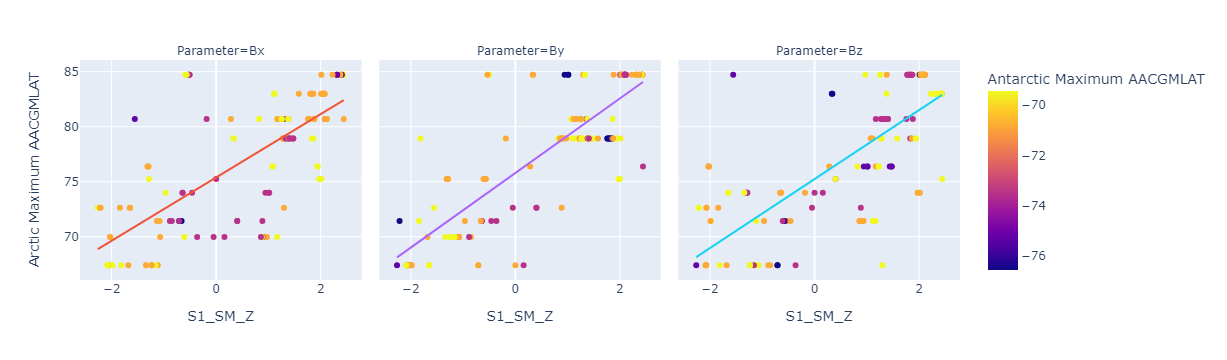

In [21]:
px.scatter(df, x = 'S1_SM_Z', y = 'Arctic Maximum AACGMLAT', color = 'Antarctic Maximum AACGMLAT', facet_col = 'Parameter', trendline = 'ols')

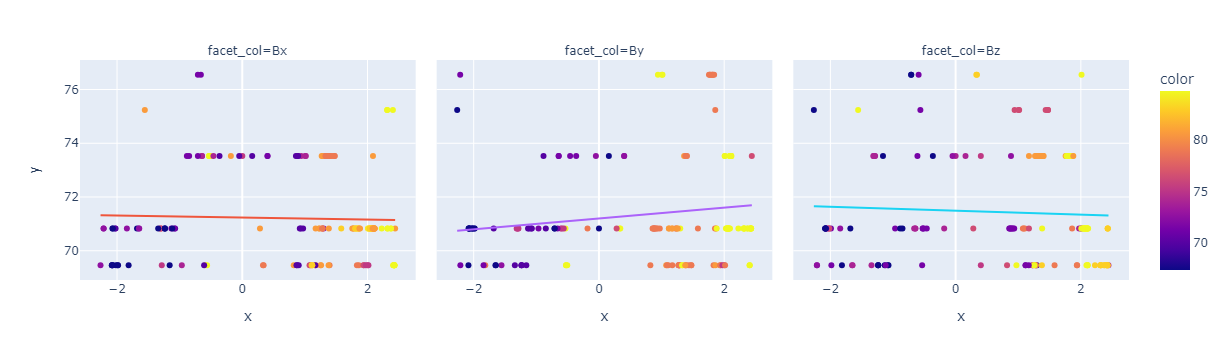

In [8]:
# df['parameter_idx'] = int(df.Parameter == "Bz") + int(df.Parameter == "By" or df.Parameter == "Bz")
px.scatter(x = df['S1_SM_Z'], y = df['Antarctic Maximum AACGMLAT'].abs(), color = df['Arctic Maximum AACGMLAT'], trendline = 'ols', facet_col = df["Parameter"])

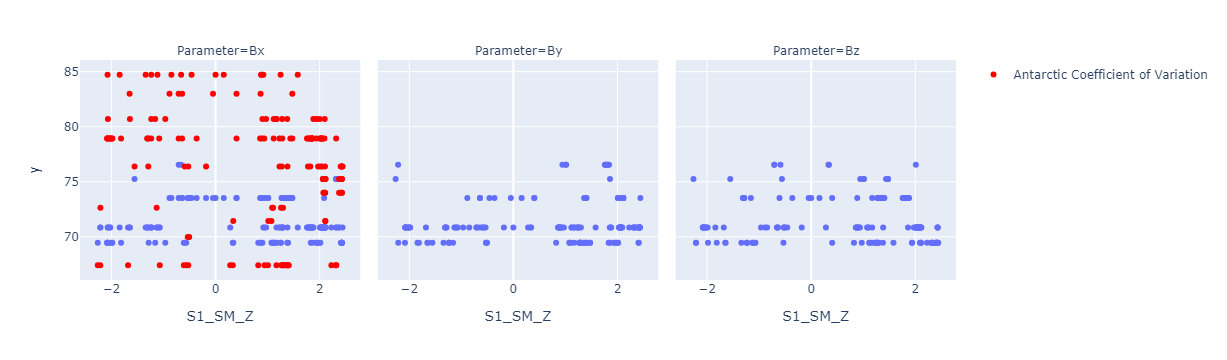

In [9]:
# Create the base scatter plot
fig = px.scatter(df, x='S1_SM_Z', y=df['Antarctic Maximum AACGMLAT'].abs(), facet_col = "Parameter")

# # Add another trace for the Antarctic Coefficient of Variation
fig.add_trace(go.Scatter(x=dfX['S1_SM_Z'], y=df['Arctic Maximum AACGMLAT'], name='Antarctic Coefficient of Variation', mode='markers',marker=dict(color='red')))

# Show the plot
# fig.show()

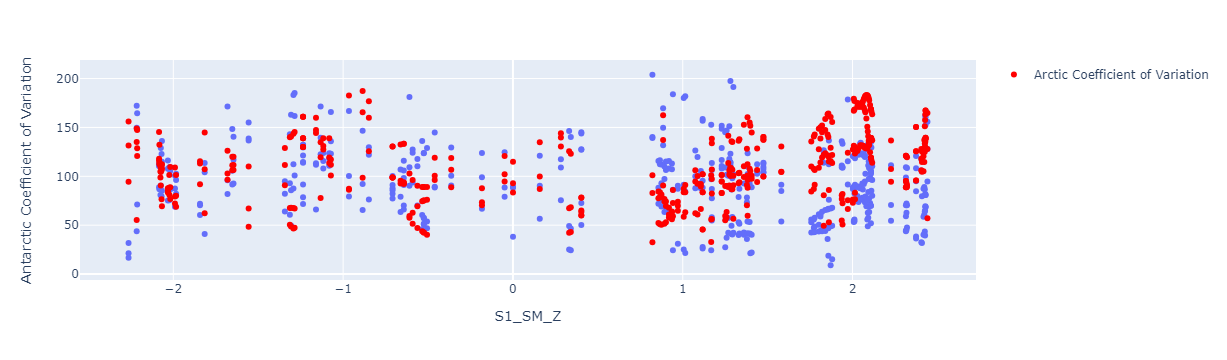

In [10]:
fig = px.scatter(df, x = 'S1_SM_Z', y = 'Antarctic Coefficient of Variation')
fig.add_trace(go.Scatter(x=df['S1_SM_Z'], y=df['Arctic Coefficient of Variation'], name='Arctic Coefficient of Variation', mode='markers',marker=dict(color='red')
    )
)

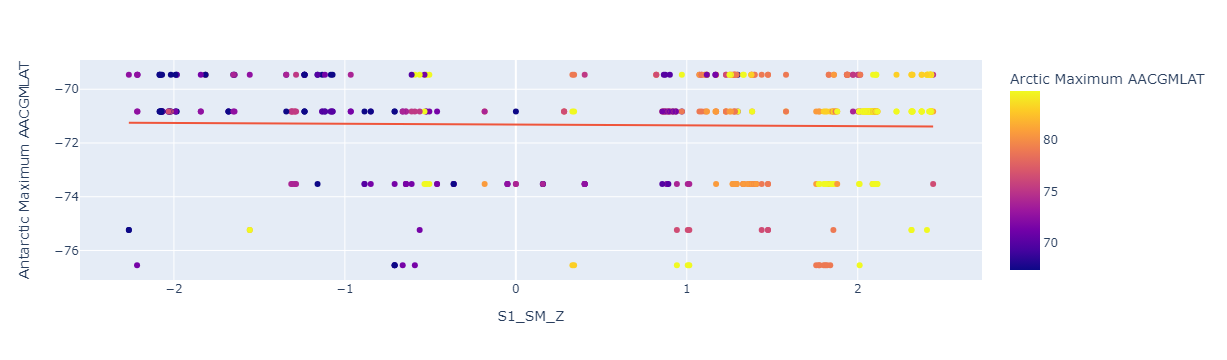

In [11]:
px.scatter(df, x = 'S1_SM_Z', y = 'Antarctic Maximum AACGMLAT', color = 'Arctic Maximum AACGMLAT', trendline="ols")

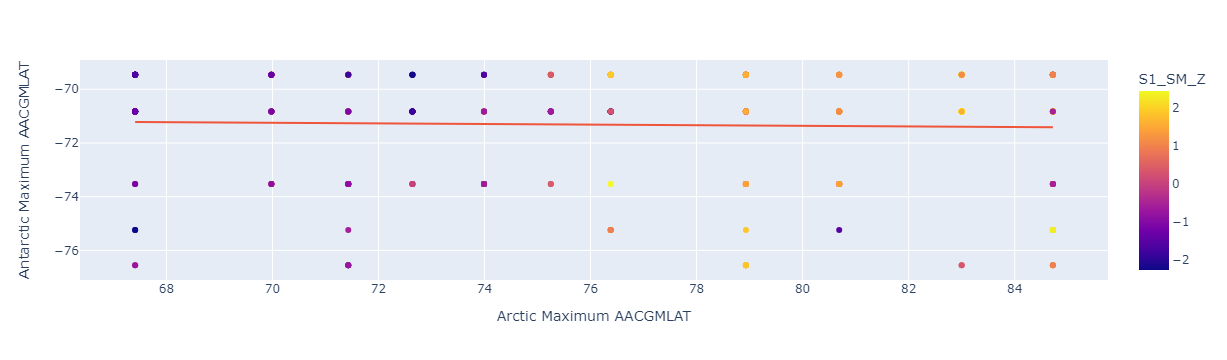

In [12]:
px.scatter(df, x = 'Arctic Maximum AACGMLAT', y = 'Antarctic Maximum AACGMLAT', color = 'S1_SM_Z', trendline="ols")

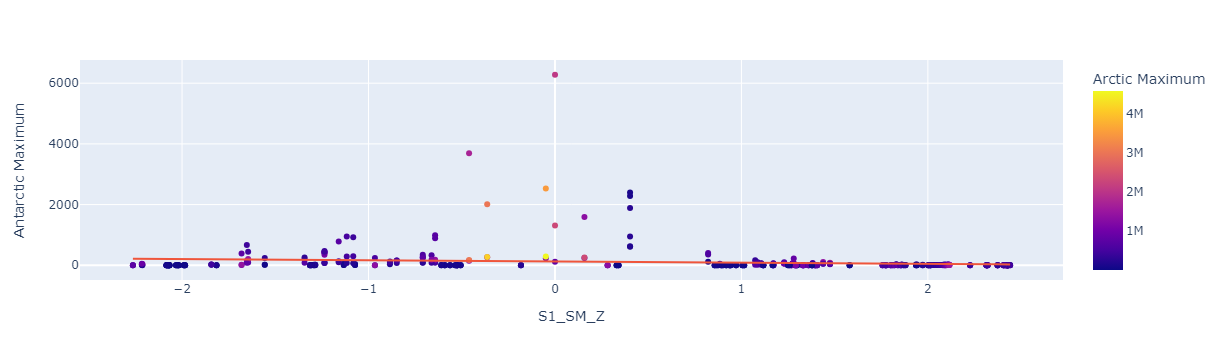

In [13]:
px.scatter(df, x = 'S1_SM_Z', y = 'Antarctic Maximum', color = 'Arctic Maximum', hover_data = ["Max"], trendline="ols")

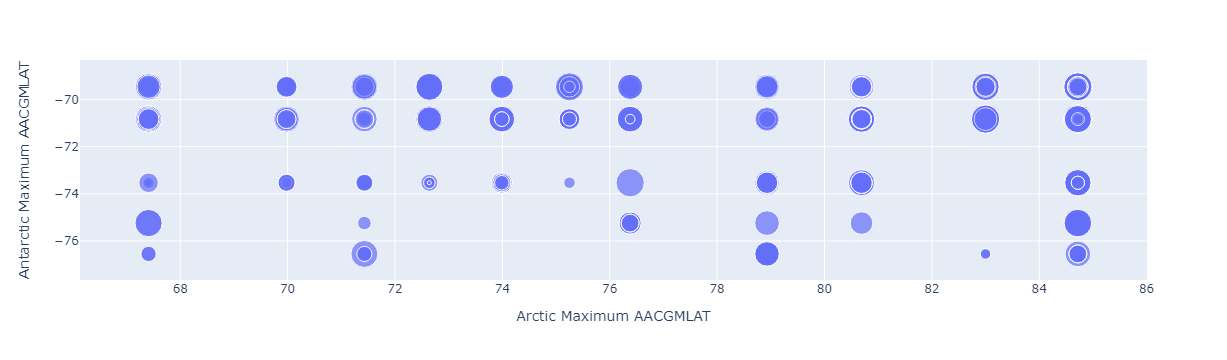

In [14]:
px.scatter(df, x = 'Arctic Maximum AACGMLAT', y = 'Antarctic Maximum AACGMLAT', size = df['S1_SM_Z'].abs(), hover_data = ["Max"])

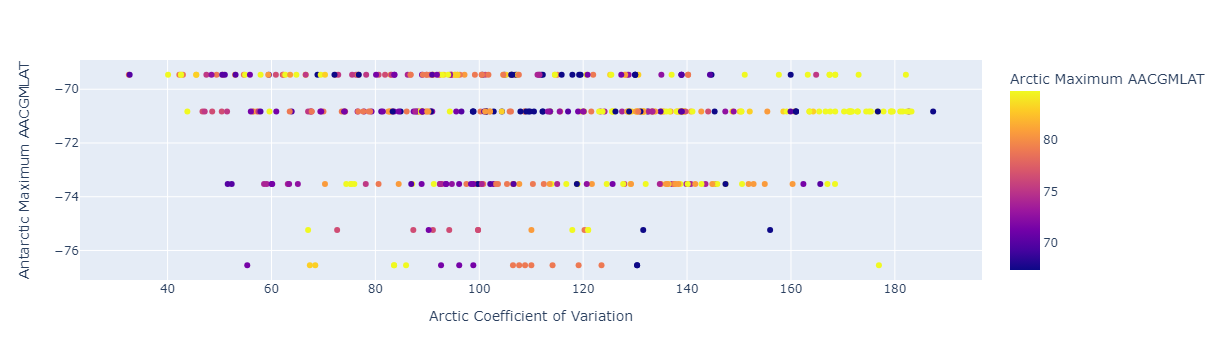

In [15]:
px.scatter(df, x = 'Arctic Coefficient of Variation', y = 'Antarctic Maximum AACGMLAT',  color = 'Arctic Maximum AACGMLAT', hover_data = ["Max"])

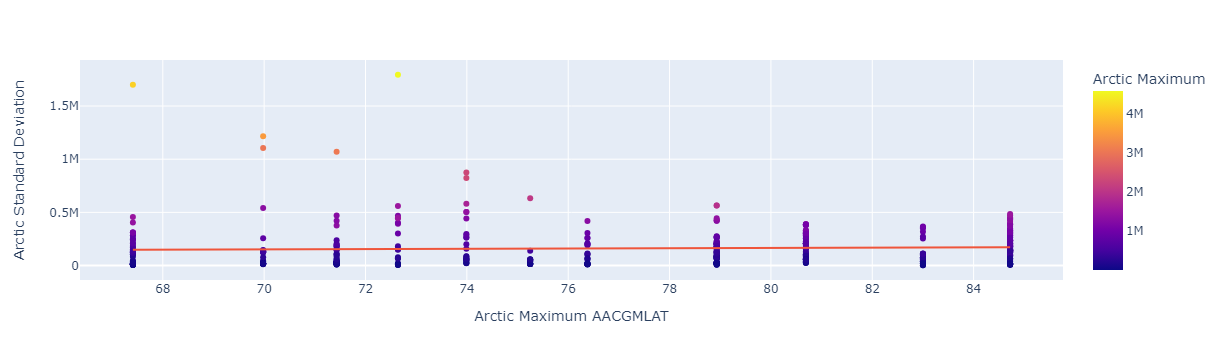

In [16]:
px.scatter(df, x = 'Arctic Maximum AACGMLAT', y = 'Arctic Standard Deviation', color = 'Arctic Maximum', hover_data = ["Max"], trendline="ols")

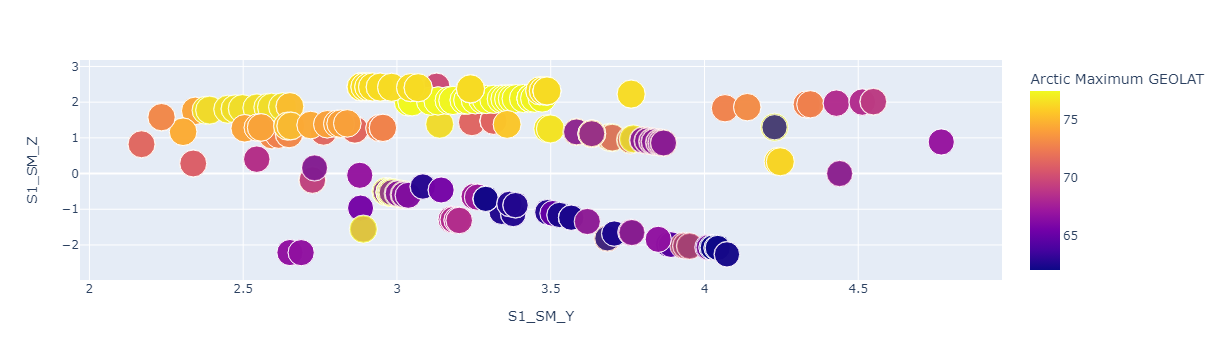

In [17]:
px.scatter(df, x = 'S1_SM_Y', y = 'S1_SM_Z', hover_data = ["Max"], size =df['Arctic Maximum AACGMLAT']*4/70, color = 'Arctic Maximum GEOLAT')

In [19]:
# px.scatter_3d(df, x = 'S1_SM_Z', y = 'Antarctic Maximum AACGMLAT', z = 'Arctic Maximum AACGMLAT', hover_data = ["Max"], color = 'Arctic Mean')
px.scatter_3d(dfX, x = 'S1_SM_X', y = 'S1_SM_Y', z = 'S1_SM_Z', hover_data = ["Max"], color = 'Antarctic Maximum AACGMLAT')
# px.scatter_3d(dfX, x = 'S1_SM_X', y = 'S1_SM_Y', z = 'S1_SM_Z', color = 'Antarctic Maximum AACGMLAT')

In [28]:
df['PG5']

0       0.28616052681254117
1       0.07511350508423403
2        1.7617317767133989
3        2.8671260782476753
4        5.0406340056287116
               ...         
481      18.062322358392045
482      10.660669815060576
483    0.029374145626301897
484    0.027030535015552706
485      0.3237350865853739
Name: PG5, Length: 486, dtype: object